In [1]:
import uproot

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import seaborn as sn
from tqdm import tqdm

import numpy as np
from numpy import array, where, shape, reshape
np.set_printoptions(threshold=1000)

import pandas as pd

from analysis_simulation import Analysis_simulation, hist

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Useful Functions

In [2]:
def magnitude(vector): 
    return np.sqrt(sum(pow(element, 2) for element in vector))

In [3]:
def hist2D(x_var, y_var, bins, xtitle, ytitle):
    plt.figure(figsize=(8,6))
    sn.histplot(x = x_var, y = y_var, bins = bins)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    #plt.xlim(-800,500)
    plt.show()

In [4]:
def hist(x, bins, xtitle, ytitle = None, title = None):
    
    plt.figure(figsize=(8,6))
    sn.histplot(x, bins = bins)
    plt.xlabel(xtitle)
    
    if ytitle == None:
        plt.ylabel('events')
    else:
        plt.ylabel(ytitle)
        
    if title == None:
        plt.title(xtitle)
    else:
        plt.title(title)
        
    plt.yscale('log')
    plt.savefig('figs/'+str(xtitle) + str(title)+'.pdf', format = 'pdf')
    #plt.show()

In [5]:
hist(mc_radius_ev, 100, 'mc_radius_ev', 'data quantity', 'Radius generation ID = ' + str(evID))

NameError: name 'mc_radius_ev' is not defined

--------------------------

In [6]:
file = uproot.open("/sno/py_out1.root")

### Event Info.

In [7]:
data1 = file['T;7']
data1.keys()

['evtid',
 'mc_position',
 'mc_momentum',
 'position',
 'momentum',
 'hit_pmtid',
 'hit_pmttime',
 'hit_residual',
 'hit_type']

In [8]:
evtid = np.array(data1['evtid'])
mc_position = np.array(data1['mc_position'])
position = np.array(data1['position'])
hit_pmtid = np.array(data1['hit_pmtid'])
hit_pmttime = np.array(data1['hit_pmttime'])
hit_residual = np.array(data1['hit_residual'])
hit_type = np.array(data1['hit_type'])

### PMT Info.

In [9]:
pmt_info = file['pmt;1']
pmt_info.keys()

['pmt_id', 'pmt_pos_xyz', 'pmt_pos_sph', 'pmt_type']

In [10]:
pmt_id = array(pmt_info['pmt_id'])
pmt_pos_xyz = array(pmt_info['pmt_pos_xyz'])
pmt_pos_sph = array(pmt_info['pmt_pos_sph'])
pmt_type = array(pmt_info['pmt_type'])

# Explore PMT Type

In [11]:
#how many differents of pmt types are? There is the answer
types_pmt = np.unique(pmt_type)
types_pmt

array([ 1,  2,  3,  4,  5,  6,  7, 10])

-----------------------------

### Pruebas: variables dinamicas

In [12]:
prefix = "dynamic_"
suffix = "_variable"
var_num = [1,2,3]
equal = [42, 52, 62]

# Creating dynamic variable name using globals()
for i in range(2):
    v = locals()[prefix + str(var_num[i]) + suffix]
    v = equal[i]
    v = v + 1
# Accessing dynamic variable
print(dynamic_1_variable) 

KeyError: 'dynamic_1_variable'

------------------------------------------

In [13]:
#Lets separate their coordinates

prefix = 'type_'
suffix = '_xyz'

type_var = np.unique(pmt_type)

for i in type_var:
    condition = (pmt_type == i)
    locals()[prefix + str(i) + suffix] = []
    
    for j in (where(condition)[0]):
        locals()[prefix + str(i) + suffix].append(pmt_pos_xyz[j])
    locals()[prefix + str(i) + suffix] = np.array(locals()[prefix + str(i) + suffix])

In [14]:
type_1_xyz

array([[ 5467.54,    63.44, -6406.27],
       [ 5615.16,   266.8 , -6251.09],
       [ 5762.73,   469.91, -6095.92],
       ...,
       [ 6275.45, -5446.47,  1161.1 ],
       [ 5941.19, -5754.32,  1395.85],
       [ 6078.68, -5666.4 ,  1149.76]])

### Distribution of PMT positions around the vesel

In [15]:
%matplotlib

#Add points - PMT coords!

type_x = type_1_xyz[:,0]
type_y = type_1_xyz[:,1]
type_z = type_1_xyz[:,2]

fig = plt.figure(figsize = (10,10))

# Parámetros para crear la esfera
r = 6000  # Radio de la esfera
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# Coordenadas cartesianas para la esfera
x = r * np.sin(phi) * np.cos(theta)
y = r * np.sin(phi) * np.sin(theta)
z = r * np.cos(phi)

# Configuración de la figura 3D
ax = fig.add_subplot(projection='3d')

# Graficar la esfera
ax.scatter(type_x, type_y, type_z, c = 'r', s = 1, label = 'PMT')
#ax.scatter(x, y, z, alpha=0.5, color = 'blue',label = '2')
ax.plot_wireframe(x, y, z, alpha=0.5, color = 'blue',label = 'VESEL')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Mostrar la gráfica
plt.show()


Using matplotlib backend: Qt5Agg


# 1. Explorara eventos simulados

## 1.1 Generación de eventos

#### NOTAS 

- Las coordenadas de PMTs se repiten a lo largo del mismo PMTid (logico, un eventID es un unico evento con un vertex definido)
- Los eventID no estan uniformemente distribuidos, osea, no sigue una secuencia de números crecientes.

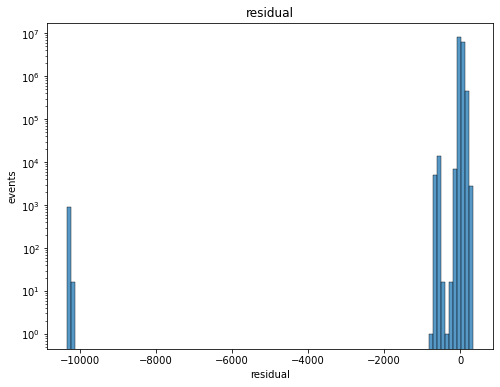

In [17]:
hist(hit_residual, 100, 'residual')

In [18]:
hit_residual

array([  -0.6514766 ,   -1.27928804,    2.2321641 , ...,  217.41476103,
        230.00421411, -592.20768888])

In [19]:
evtid

array([   0,    0,    0, ..., 1994, 1994, 1994])

In [24]:
magnitude(mc_position[1001]) 

4424.431648988956

In [25]:
mc_position

array([[ 2494.06640625, -2212.07226562,  1598.22375488],
       [ 2494.06640625, -2212.07226562,  1598.22375488],
       [ 2494.06640625, -2212.07226562,  1598.22375488],
       ...,
       [-2837.71142578,  -448.9992981 , -2005.33300781],
       [-2837.71142578,  -448.9992981 , -2005.33300781],
       [-2837.71142578,  -448.9992981 , -2005.33300781]])

In [26]:
shape(mc_position)

(14618962, 3)

In [27]:
where(evtid == 2000)[0]

array([ 4392209,  4392210,  4392211, ..., 11706741, 11706742, 11706743],
      dtype=int64)

In [28]:
mc_position[73999:74004]

array([[ 1277.87878418,  2039.73510742,   114.69667053],
       [-1219.36608887,  4914.97949219, -1109.62072754],
       [-1219.36608887,  4914.97949219, -1109.62072754],
       [-1219.36608887,  4914.97949219, -1109.62072754],
       [-1219.36608887,  4914.97949219, -1109.62072754]])

In [29]:
mc_position[0:5]

array([[ 2494.06640625, -2212.07226562,  1598.22375488],
       [ 2494.06640625, -2212.07226562,  1598.22375488],
       [ 2494.06640625, -2212.07226562,  1598.22375488],
       [ 2494.06640625, -2212.07226562,  1598.22375488],
       [ 2494.06640625, -2212.07226562,  1598.22375488]])

In [30]:
np.unique(evtid,return_counts=True)

(array([   0,    1,    2, ..., 1998, 1999, 2000]),
 array([7772, 7495, 7926, ..., 2187, 2453, 1525], dtype=int64))

In [31]:
mc_position[0:7772-1]

array([[ 2494.06640625, -2212.07226562,  1598.22375488],
       [ 2494.06640625, -2212.07226562,  1598.22375488],
       [ 2494.06640625, -2212.07226562,  1598.22375488],
       ...,
       [ 3944.20922852, -4488.93115234,   519.58605957],
       [  443.98831177,   847.4755249 ,  4560.33203125],
       [  443.98831177,   847.4755249 ,  4560.33203125]])

In [32]:
evtid[0:7772-1]

array([ 0,  0,  0, ...,  9, 10, 10])

### Rádio de evento para un event ID (es esperado observar un unico radio por eventID)

In [36]:
ID = 1
condition = (evtid == ID)

mc_position_ev = []
mc_radius_ev = np.array([])

for i in where(condition)[0]:
    mc_position_ev.append(mc_position[i])
mc_position_ev = np.array(mc_position_ev)

for i in range(shape(mc_position_ev)[0]):
    radius = magnitude(mc_position_ev[i])
    mc_radius_ev = np.append(mc_radius_ev, radius)

In [37]:
mc_radius_ev

array([4424.43164899, 4424.43164899, 4424.43164899, ..., 1421.43670778,
       1421.43670778, 1421.43670778])

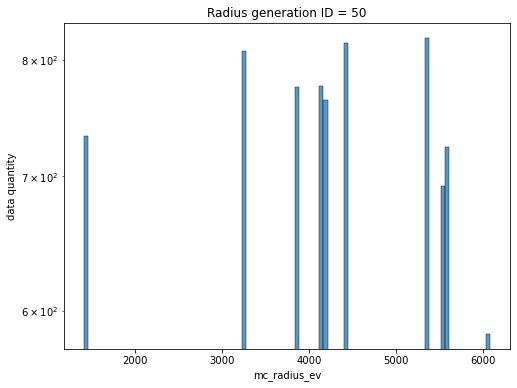

In [53]:
#Diferentes radios de generación para un mismo ID.... Muy extraño.
hist(mc_radius_ev, 100, 'mc_radius_ev', 'data quantity', 'Radius generation ID = ' + str(ID))

#RESPUESTA: Hay mas que una run de simulación dentro de estos datos!

### 1.2 Separar estos eventos ID repetidos

El siguinte procedimiento solo es valido si queremos analisar un unico evento ID

In [19]:
# PRUEBA

#Funcionamineto: Esta série de instrucciones agrupa elementos repetido en un array y los separa en subconjuntos. Dado un break del subconjunto (
# usando una descontinuidad de contaje en la función where) ocurria una quiebra del conjunto al encontrar esta descontinuidad e se grabará el indice
# de inicio del conunto en break_data. Luego, los conjuntos podran ser separados usando el elemento inicial del un (n)subgrupo y el elemento inicial
# del (n+1)subgrupo. 
# NOTA: Caso estemos lidiando con el ultimo de los subgrupos, unicamente apareceran los elementos repetidos que deseamos obtener de ese subgrupo, y por
# lo tanto break_data solo almacena los limites de este ultimo subgrupo donde se encuentran los elementos repetidos.

a = np.array([0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,1,1])

element = 0

index = where(a == element)[0]
break_data = np.array([index[0]], dtype = np.int64)    #indices where data Breaks - Indices where subsets start

# extract the index where data breaks
for i in range(len(index)-1):
    #print(index[i])
    if index[i+1] != index[i]+1:
        break_data = np.append(break_data,index[i+1])
        
break_data = np.append(break_data,index[-1]+1)

#Observe subsets-------------------------
a_new = a[break_data[1]:break_data[2]]
print(a_new)
#-----------------------------------------

#Then, break_data[i]:break_data[i+1] contains the index of elements in subset desired


[0 0 0 0 1 1 1]


In [20]:
break_data

array([ 0,  6, 13, 18], dtype=int64)

In [21]:
index

array([ 0,  1,  2,  6,  7,  8,  9, 13, 14, 15, 16, 17], dtype=int64)

In [22]:
a[3]

1

#### testing eventID subset separation

In [54]:
ID = 50

index = where(evtid == ID)[0]
break_data = np.array([index[0]], dtype = np.int64)    #indices where data Breaks - Indices where subsets start

# extract the index where data breaks
for i in range(len(index)-1):
    #print(index[i])
    if index[i+1] != index[i]+1:
        break_data = np.append(break_data,index[i+1])
        
break_data = np.append(break_data,index[-1]+1)

In [55]:
break_data

array([   36248,  1498592,  2968505,  5890054,  7367733,  8810312,
       10273722, 11742822, 13192075, 13192932], dtype=int64)

In [56]:
new_evtid = evtid[break_data[0]:break_data[1]]
new_pmtid = hit_pmtid[break_data[0]:break_data[1]]
new_pmt_coord = position[break_data[0]:break_data[1]]

In [57]:
new_pmt_coord

array([[-1776.94067383,  -803.19329834, -1410.01635742],
       [-1776.94067383,  -803.19329834, -1410.01635742],
       [-1776.94067383,  -803.19329834, -1410.01635742],
       ...,
       [ 1700.28027344, -3139.0234375 ,  1201.49853516],
       [ 1700.28027344, -3139.0234375 ,  1201.49853516],
       [ 1700.28027344, -3139.0234375 ,  1201.49853516]])

In [58]:
evtid

array([   0,    0,    0, ..., 1994, 1994, 1994])

In [59]:
len(new_evtid)

1462344

In [60]:
len(new_pmtid)

1462344

In [61]:
len(hit_pmtid)

14618962

In [62]:
# It works, know is necessary to create a new dataset ...

#### Puebas Creating new Dataset: construct the new Data set using Pandas -----------------

In [63]:
np.array(['residual:', 1,2,1])[1:]

array(['1', '2', '1'], dtype='<U11')

In [64]:
data = {'ID': new_evtid,
       'position': new_pmt_coord.tolist(),
       'ID': new_evtid}

In [65]:
df = pd.DataFrame(data)
df

,ID,position
0,50,"[-1776.940673828125, -803.1932983398438, -1410..."
1,50,"[-1776.940673828125, -803.1932983398438, -1410..."
2,50,"[-1776.940673828125, -803.1932983398438, -1410..."
3,50,"[-1776.940673828125, -803.1932983398438, -1410..."
4,50,"[-1776.940673828125, -803.1932983398438, -1410..."
...,...,...
1462339,49,"[1700.2802734375, -3139.0234375, 1201.49853515..."
1462340,49,"[1700.2802734375, -3139.0234375, 1201.49853515..."
1462341,49,"[1700.2802734375, -3139.0234375, 1201.49853515..."
1462342,49,"[1700.2802734375, -3139.0234375, 1201.49853515..."


In [66]:
df['ID']

0          50
1          50
2          50
3          50
4          50
           ..
1462339    49
1462340    49
1462341    49
1462342    49
1462343    49
Name: ID, Length: 1462344, dtype: int32

### Something wrong with the Sublime text function ...

In [67]:
from clean_func import unique_ID

In [68]:
new_data = unique_ID(file,11,[0,1])

In [69]:
new_data

,ID,mc_position,position,hit_pmtid,hit_residual,hit_type
0,11,"[3557.810791015625, -2256.099365234375, 3368.9...","[3561.62646484375, -2245.269775390625, 3416.09...",2579,-10318.783516,2
1,11,"[3557.810791015625, -2256.099365234375, 3368.9...","[3561.62646484375, -2245.269775390625, 3416.09...",8519,0.693626,2
2,11,"[3557.810791015625, -2256.099365234375, 3368.9...","[3561.62646484375, -2245.269775390625, 3416.09...",8484,4.454419,2
3,11,"[3557.810791015625, -2256.099365234375, 3368.9...","[3561.62646484375, -2245.269775390625, 3416.09...",8966,2.283129,2
4,11,"[3557.810791015625, -2256.099365234375, 3368.9...","[3561.62646484375, -2245.269775390625, 3416.09...",8511,2.395939,2
...,...,...,...,...,...,...
1462618,10,"[-780.6781616210938, -968.087646484375, 2086.3...","[-651.8865356445312, -986.0009765625, 2008.384...",951,208.997852,2
1462619,10,"[-780.6781616210938, -968.087646484375, 2086.3...","[-651.8865356445312, -986.0009765625, 2008.384...",5092,217.645433,2
1462620,10,"[-780.6781616210938, -968.087646484375, 2086.3...","[-651.8865356445312, -986.0009765625, 2008.384...",1861,215.030181,2
1462621,10,"[-780.6781616210938, -968.087646484375, 2086.3...","[-651.8865356445312, -986.0009765625, 2008.384...",384,219.721655,2


In [70]:
subset = [0,1]  #first subset

init =  break_data[subset[0]]
final = break_data[subset[1]]

#Extract new data: 
new_evtid = evtid[init:final]
new_mc_position = mc_position[init:final]
new_position = position[init:final]
new_hit_pmtid = hit_pmtid[init:final]
new_hit_pmttime = hit_pmttime[init:final]
new_hit_residual = hit_residual[init:final]
new_hit_type = hit_type[init:final]

#Construct DataFrame: Only useful if I want to return it from a function

data = {'ID': new_evtid,
        'mc_position': new_mc_position.tolist(),
        'position': new_position.tolist(),
        'hit_pmtid': new_hit_pmtid,
        'hit_pmttime': new_hit_pmttime,
        'hit_residual': new_hit_residual,
        'hit_type': new_hit_type,
        }

data_frame = pd.DataFrame(data)
data_frame

,ID,mc_position,position,hit_pmtid,hit_pmttime,hit_residual,hit_type
0,50,"[-1761.8115234375, -815.3781127929688, -1181.5...","[-1776.940673828125, -803.1932983398438, -1410...",3101,170.705887,-99.241001,2
1,50,"[-1761.8115234375, -815.3781127929688, -1181.5...","[-1776.940673828125, -803.1932983398438, -1410...",5526,200.857147,-65.833732,2
2,50,"[-1761.8115234375, -815.3781127929688, -1181.5...","[-1776.940673828125, -803.1932983398438, -1410...",4806,267.919067,3.481335,1
3,50,"[-1761.8115234375, -815.3781127929688, -1181.5...","[-1776.940673828125, -803.1932983398438, -1410...",5302,267.341034,2.830712,1
4,50,"[-1761.8115234375, -815.3781127929688, -1181.5...","[-1776.940673828125, -803.1932983398438, -1410...",5200,268.381500,3.795559,2
...,...,...,...,...,...,...,...
1462339,49,"[1594.3828125, -3157.965576171875, 1442.112182...","[1700.2802734375, -3139.0234375, 1201.49853515...",8525,471.194031,204.287631,2
1462340,49,"[1594.3828125, -3157.965576171875, 1442.112182...","[1700.2802734375, -3139.0234375, 1201.49853515...",6866,470.895508,200.414580,2
1462341,49,"[1594.3828125, -3157.965576171875, 1442.112182...","[1700.2802734375, -3139.0234375, 1201.49853515...",1470,472.835815,179.318511,2
1462342,49,"[1594.3828125, -3157.965576171875, 1442.112182...","[1700.2802734375, -3139.0234375, 1201.49853515...",1328,480.000000,198.561695,2


### unique_ID function here

In [40]:
def unique_ID(file, evID, subset):

    #function which extracts info. of an event given the event ID.
    #It function also clean the repeated eventID in PMT info using subsets division
    #It function return a Pandas Dataframe with the information

    # -Parameters:

    #file: file with information after passing through uproot
    #evID is the ID number
    #subset -> 2x1 array of index: [i_init_subset(n) , i_init_subset(n+1)]. exm: [0,1], [1,2], [2,3], ...
    #-------------------------------------------------------
    import numpy as np
    from numpy import array, where, shape, reshape
    import pandas as pd

    #Load file
    #EV info
    data1 = file['T;7']
    
    evtid = np.array(data1['evtid'])
    mc_position = np.array(data1['mc_position'])
    position = np.array(data1['position'])
    hit_pmtid = np.array(data1['hit_pmtid'])
    hit_pmttime = np.array(data1['hit_pmttime'])
    hit_residual = np.array(data1['hit_residual'])
    hit_type = np.array(data1['hit_type'])


    #Exclusion of repeated eventID of different simulations: Subset division

    index = where(evtid == evID)[0]
    break_data = np.array([index[0]], dtype = np.int64)  # #indices where data Breaks - Indices where subsets start

    for i in range(len(index)-1):
        if index[i+1] != index[i]+1:
            break_data = np.append(break_data,index[i+1])
    break_data = np.append(break_data,index[-1]+1)

    init =  break_data[subset[0]]
    final = break_data[subset[1]]

    #Extract new data: 

    new_evit = evtid[init:final]
    new_mc_position = mc_position[init:final]
    new_position = position[init:final]
    new_hit_pmtid = hit_pmtid[init:final]
    new_hit_pmttime = hit_pmttime[init:final]
    new_hit_residual = hit_residual[init:final]
    new_hit_type = hit_type[init:final]

    #Construct DataFrame:

    data = {'ID': new_evit,
            'mc_position': new_mc_position.tolist(),
            'position': new_position.tolist(),
            'hit_pmtid': new_hit_pmtid,
            'hit_pmttime': new_hit_pmttime,
            'hit_residual': new_hit_residual,
            'hit_type': new_hit_type,
            }

    data_frame = pd.DataFrame(data)

    return data_frame

In [41]:
new_data = unique_ID(file,11,[0,1])

In [77]:
new_position

array([[-1776.94067383,  -803.19329834, -1410.01635742],
       [-1776.94067383,  -803.19329834, -1410.01635742],
       [-1776.94067383,  -803.19329834, -1410.01635742],
       ...,
       [ 1700.28027344, -3139.0234375 ,  1201.49853516],
       [ 1700.28027344, -3139.0234375 ,  1201.49853516],
       [ 1700.28027344, -3139.0234375 ,  1201.49853516]])

### 1.3 Analisar datos de eventID de una sola simulación

In [72]:
condition = (new_evtid == ID)

pmtid_ev = np.extract(condition, new_hit_pmtid) #Indices for which elements are True in eventID then extract the hit_pmtID
time_res_ev = np.extract(condition, new_hit_residual)
pmttime_ev = np.extract(condition, new_hit_pmttime)
pmt_type_ev = np.extract(condition, new_hit_type)

#Position
mc_position_ev = []
position_ev = []
mc_radius_ev = np.array([])

for i in where(condition)[0]:
    mc_position_ev.append(new_mc_position[i])
    position_ev.append(new_position[i])
mc_position_ev = np.array(mc_position_ev)
position_ev = np.array(position_ev)

for i in range(shape(mc_position_ev)[0]):
    radius = magnitude(mc_position_ev[i])
    mc_radius_ev = np.append(mc_radius_ev, radius)

In [74]:
position_ev[0]

array([-1776.94067383,  -803.19329834, -1410.01635742])

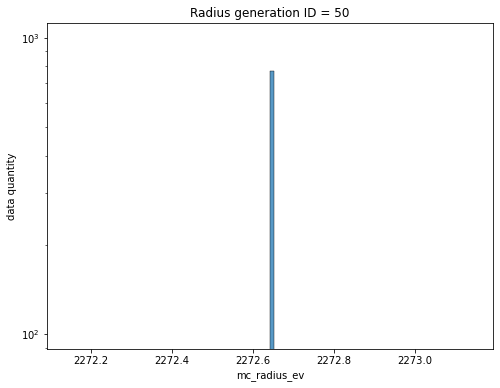

In [72]:
#Separación existosa :) 
hist(mc_radius_ev, 100, 'mc_radius_ev', 'data quantity', 'Radius generation ID = ' + str(ID))

#evtID=50 es un buen evento (se genera lejos del VESEL)

In [85]:
dif=magnitude(mc_position_ev[0]-position_ev[0])
dif

229.281677361509

In [86]:
mc_position_ev[0]

array([-1761.81152344,  -815.37811279, -1181.55908203])

In [89]:
position_ev[0]

array([-1776.94067383,  -803.19329834, -1410.01635742])

In [88]:
position_ev[0]-mc_position_ev[0]

array([ -15.12915039,   12.18481445, -228.45727539])

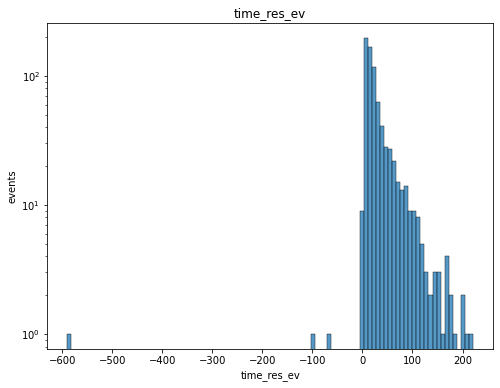

In [73]:
#Time residual
hist(time_res_ev, 100, 'time_res_ev')

#### Demostración que los time residual < -200 ns pueden ser debidos a pmt_type diferentes de 1

In [74]:
pmtid_ev[where(time_res_ev<-200)[0][0]]

9207

In [75]:
pmt_type[9207]

6

### 1.4 Ahora hagamos cortes en PMT type

In [76]:
#PMT type deseado
valid_type = 1

# PMT id validos
valid_pmt_id = np.array([],dtype = np.int64)

valid_info_pmt_i = where(pmt_type == valid_type)[0]

for i in valid_info_pmt_i:
    valid_pmt_id = np.append(valid_pmt_id, pmt_id[i])

    
# Buscar información valida dentro del eventos:

#indices de info. valida
valid_info_ev_i = where(np.in1d(pmtid_ev, valid_pmt_id))

#informacón que deseo observar
time_res_ev_valid = np.array([])
pmt_id_ev_valid = np.array([], dtype = np.int64)

for j in valid_info_ev_i:
    time_res_ev_valid = np.append(time_res_ev_valid, time_res_ev[j])
    pmt_id_ev_valid = np.append(pmt_id_ev_valid, pmtid_ev[j])

### Nueva distribución de time residual para un único evento ID de simulación + cortes en pmt type


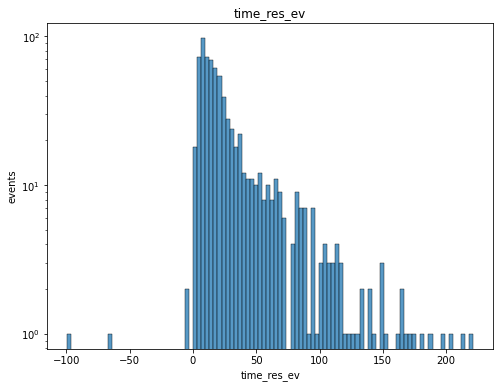

In [77]:
#LO CONSEGUI! (evtid = 50)
hist(time_res_ev_valid, 100, 'time_res_ev')

### 1.5 Cortes en time residual y observar PMT que dan hits

In [78]:
cut_time = 50

condition = (time_res_ev_valid < cut_time)
#index of info in event where condition is verified
cut_i = where(condition)[0]

pmt_id_ev_cut = np.array([], dtype = np.int64)

for i_dx in cut_i:
    pmt_id_ev_cut = np.append(pmt_id_ev_cut, pmt_id_ev_valid[i_dx])

In [79]:
# coordinates xys of PMT giving hit in the time residual cut
coord_pmt_cut = []

for k in pmt_id_ev_cut:
    coord_pmt_cut.append(pmt_pos_xyz[k])
coord_pmt_cut = np.array(coord_pmt_cut)

In [82]:
%matplotlib
ax = fig.add_subplot(projection='3d')
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

x = coord_pmt_cut[:,0]
y = coord_pmt_cut[:,1]
z = coord_pmt_cut[:,2]

mc_event_coord = mc_position_ev[0]
recons_ev_coord = position_ev[0]

ax.scatter(mc_event_coord[0], mc_event_coord[1], mc_event_coord[2], c = 'r', s =6, label = 'mc event')
ax.scatter(recons_ev_coord[0], recons_ev_coord[1], recons_ev_coord[2], c = 'g', s =6, label = 'reconstructed events')
ax.scatter(x, y, z, c = 'b', s = 2, label = 'PMT hit')

ax.legend()

Using matplotlib backend: Qt5Agg


In [166]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s= 5)
plt.show()

In [6]:
from analysis_simulation import Analysis_simulation

In [9]:
Analysis_simulation(file,[11])

,eventID,hitpmt ID,mc radius,reconst radius,reconst error
0,11,"[2579, 8519, 8484, 8966, 8511, 8507, 8486, 897...",5394.239748,5421.818817,48.522873


### 1.6 Explorar eventos mal reconstruidos dentro de un subconjunto

#### 1.6.1 Error vs mc_rad

In [10]:
IDs = np.arange(100)
df = Analysis_simulation(file, IDs)

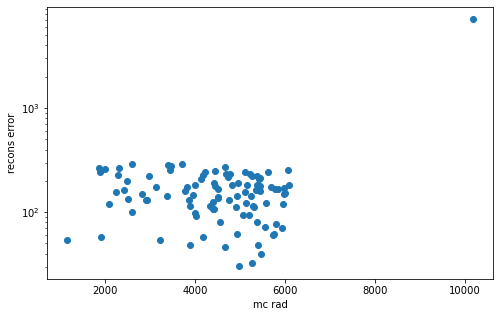

In [11]:
mc_rad = np.array(df['mc radius'])
recons_error= np.array(df['reconst error'])

plt.figure(figsize=(8,5))
plt.plot(mc_rad, recons_error, 'o')
plt.xlabel('mc rad')
plt.ylabel('recons error')
plt.yscale('log')

In [10]:
type(file
)

uproot.reading.ReadOnlyDirectory

In [9]:
np.arange(51)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])